In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_iris  
#载入数据集  
iris = load_iris()  

In [3]:
x = iris.data
y = iris.target

# 相似度矩阵

In [4]:
distance = np.zeros((150, 150))#初始化相似度矩阵

In [5]:
#用余弦夹角计算相似度,数越大表示夹角越小，相似度越高
for i in  range(0,150):
    for j in range(0,150):
        distance[i][j]= np.inner(x[i],x[j])/np.sqrt(np.inner(x[i],x[i])*np.inner(x[j],x[j]))

In [6]:
print(distance)

[[1.         0.99857916 0.99998735 ... 0.89178641 0.8839093  0.88670276]
 [0.99857916 1.         0.99879145 ... 0.90415045 0.89380008 0.89787445]
 [0.99998735 0.99879145 1.         ... 0.89362867 0.88566903 0.88845942]
 ...
 [0.89178641 0.90415045 0.89362867 ... 1.         0.99780473 0.99912584]
 [0.8839093  0.89380008 0.88566903 ... 0.99780473 1.         0.99886925]
 [0.88670276 0.89787445 0.88845942 ... 0.99912584 0.99886925 1.        ]]


# 将样本转化成图的形式

In [7]:
H = nx.Graph()
Matrix = np.ndarray.tolist(distance)

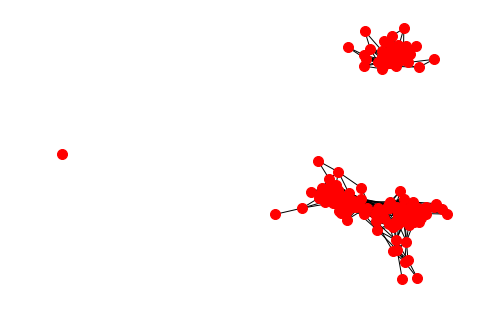

In [8]:
for i in range(0,150):
    for j in range(i,150):
        if Matrix[i][j]>0.99898:
            H.add_edge(i,j)
nx.draw(H,node_size=100)
plt.show()

# 求取带权邻接矩阵

In [9]:
lin=distance

In [10]:
#小于阈值的数都设为零，减小计算量
for i in range(0,150):
    for j in range(0,150):
        if (lin[i,j]<0.99898):
            lin[i][j]=0
    lin[i][i]=0

In [11]:
lin

array([[0.        , 0.        , 0.99998735, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99998735, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99912584],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.99912584, 0.        ,
        0.        ]])

# 度数矩阵

In [12]:
d = np.diag(np.zeros(150))

In [13]:
for i in range(150):
    a=0
    for j in range(150):
         if(lin[i,j]!=0):
                a=a+1
    d[i,i]=a

In [14]:
d

array([[25.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 16.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 27., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 25.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  6.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 22.]])

# 拉普拉斯矩阵

In [15]:
L=d-lin

In [16]:
L

array([[25.        ,  0.        , -0.99998735, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 16.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.99998735,  0.        , 27.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 25.        ,
         0.        , -0.99912584],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         6.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.99912584,
         0.        , 22.        ]])

# 求取特征向量，特征值

In [17]:
a,b=np.linalg.eig(L) 

In [18]:
index = np.argsort(a)[:4]

In [19]:
#因为特征值最小的是零，所以要舍去第一个，留下三个剩余的三个索引号
index 

array([149,  11,   1,  15], dtype=int64)

In [20]:
index=index[1:4]

In [21]:
from sklearn.preprocessing import normalize

In [22]:
k = normalize(b[:, index])

# k-means聚类

In [23]:
from numpy import *  
import time 

In [24]:
#计算欧氏距离
def euclDistance(vector1, vector2):  
    return sqrt(sum(power(vector2 - vector1, 2))) 

In [25]:
def  kmeans(dataSet, k):
    numSamples,dim= dataSet.shape
    clusterAssment = mat(zeros((numSamples, 2)))  #得到一个N*2的零矩阵,保存第i个样本的类别标号以及到质心的距离
    clusterChanged = True
    
    #初始化质心，从样本中随机选取K个作为初始质心
    centroids = zeros((k, dim))
    for i in range(k):  
        index = int(random.uniform(0, numSamples))#随机产生一个数，作为质心的索引号
        centroids[i, :] = dataSet[index, :]
    
    
    while clusterChanged:  
        clusterChanged = False  
        for i in range(numSamples): 
            minDist  = 100000.0  
            minIndex = 0  
            #计算每个样本点与质点之间的距离，将其归内到距离最小的那一簇
            for j in range(k):  
                distance = euclDistance(centroids[j, :], dataSet[i, :])  
                if distance < minDist:  
                    minDist  = distance  
                    minIndex = j  

            #若所有的样本不在变化，则退出while循环
            if clusterAssment[i, 0] != minIndex:  
                clusterChanged = True  
                clusterAssment[i, :] = minIndex, minDist**2 

        #更新质心
        for j in range(k):  
            pointsInCluster = dataSet[nonzero(clusterAssment[:, 0].A ==j)[0]] #将dataSet矩阵中相对应的样本提取出来 
            centroids[j, :] = mean(pointsInCluster, axis = 0)
    return centroids, clusterAssment 

In [26]:
from sklearn.metrics import accuracy_score

In [41]:
centroids,clustAssment = kmeans(k,3)
a=clustAssment.A[:,0]
print(accuracy_score(y,a))  #打印聚类的正确率

0.9666666666666667


In [42]:
#聚类后的类别标签
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [43]:
H = nx.Graph()
Matrix = np.ndarray.tolist(distance)

In [44]:
#区分不同的类别
node_color=[]
node_color0=[]
node_color1=[]
node_color2=[]
for i in range(150):
    if(a[i]==0):
        color = 'r'
        node_color0.append(color)
    elif(a[i]==1):
        color = 'g'
        node_color1.append(color)
    else:
        color = 'b'
        node_color1.append(color)
        
    node_color.append(color)

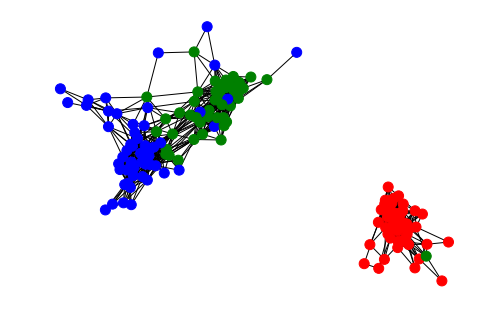

In [45]:
for i in range(0,150):
    for j in range(i,150):
        if Matrix[i][j]>0.99898:
            H.add_edge(i,j)
nx.draw(H,node_size=100,node_color=node_color)
plt.show()